# Get the Data

In [65]:
import pandas as pd
import numpy as np

In [97]:
import time

current_time = round(time.time())
print(current_time)

1607010994


min(df["date"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S').split()[0]))

In [2]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"symbol":"ABT","from":322151400,"to":1606987541,"events":"div, split","interval":"1m","region":"US"}

headers = {
    'x-rapidapi-key': "eb056a72f9msh2564512806e6aebp12a874jsnd03d93885916",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
results=response.json()
print(response.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"ABT","exchangeName":"NYQ","instrumentType":"EQUITY","firstTradeDate":322151400,"regularMarketTime":1607029362,"gmtoffset":-18000,"timezone":"EST","exchangeTimezoneName":"America/New_York","regularMarketPrice":107.53,"chartPreviousClose":0.502,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EST","start":1606986000,"end":1607005800,"gmtoffset":-18000},"regular":{"timezone":"EST","start":1607005800,"end":1607029200,"gmtoffset":-18000},"post":{"timezone":"EST","start":1607029200,"end":1607043600,"gmtoffset":-18000}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[322151400,322237800,322324200,322410600,322497000,322756200,322842600,322929000,323015400,323101800,323361000,323447400,323533800,323620200,323965800,324052200,324138600,324225000,324311400,324570600,324657000,324743400,324829800,324916200,325175400,325261800,325348200,325434600,325521000,32

In [3]:
len(results["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"])

10268

In [20]:
import pandas as pd
timestamp=[]
open=[]
high=[]
low=[]
close=[]
volume=[]
adjclose=[]

for i in range(len(results["chart"]["result"][0]["timestamp"])):
    timestamp.append(results["chart"]["result"][0]["timestamp"][i])
    open.append(results["chart"]["result"][0]["indicators"]["quote"][0]["open"][i])
    high.append(results["chart"]["result"][0]["indicators"]["quote"][0]["high"][i])
    low.append(results["chart"]["result"][0]["indicators"]["quote"][0]["low"][i])
    close.append(results["chart"]["result"][0]["indicators"]["quote"][0]["close"][i])
    volume.append(results["chart"]["result"][0]["indicators"]["quote"][0]["volume"][i])
    adjclose.append(results["chart"]["result"][0]["indicators"]["adjclose"][0]["adjclose"][i])

df=pd.DataFrame({"timestamp":timestamp,"open":open,"high":high,"low":low,"close":close,"volume":volume,"adjclose":adjclose})
    

In [21]:
df.head()

,timestamp,open,high,low,close,volume,adjclose
0,322151400,0.0,0.512028,0.497999,0.501506,7513300,0.196421
1,322237800,0.0,0.512028,0.494492,0.505013,5303400,0.197795
2,322324200,0.0,0.515535,0.503260,0.512028,2523300,0.200542
3,322410600,0.0,0.513781,0.499753,0.499753,4654800,0.195734
4,322497000,0.0,0.506767,0.499753,0.505013,1332800,0.197795


In [22]:
import datetime
df["timestamp"]=df["timestamp"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d hh:mm:ss').split()[0])

df=df.set_index("timestamp")

In [23]:
df.head(8000)

,timestamp,open,high,low,close,volume,adjclose
0,1980-03-17,0.000000,0.512028,0.497999,0.501506,7513300,0.196421
1,1980-03-18,0.000000,0.512028,0.494492,0.505013,5303400,0.197795
2,1980-03-19,0.000000,0.515535,0.503260,0.512028,2523300,0.200542
3,1980-03-20,0.000000,0.513781,0.499753,0.499753,4654800,0.195734
4,1980-03-21,0.000000,0.506767,0.499753,0.505013,1332800,0.197795
...,...,...,...,...,...,...,...
7995,2011-11-21,25.314247,25.568542,25.242277,25.319046,13070200,20.947161
7996,2011-11-22,25.280663,25.438995,25.155914,25.280663,10992700,20.915405
7997,2011-11-23,25.189501,25.381420,25.098337,25.117531,12078100,20.780441
7998,2011-11-25,25.045561,25.184702,24.973591,24.973591,4614800,20.661360


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10268 entries, 0 to 10267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  10268 non-null  object 
 1   open       10268 non-null  float64
 2   high       10268 non-null  float64
 3   low        10268 non-null  float64
 4   close      10268 non-null  float64
 5   volume     10268 non-null  int64  
 6   adjclose   10268 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 561.7+ KB


In [25]:
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10268 entries, 0 to 10267
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10268 non-null  datetime64[ns]
 1   open       10268 non-null  float64       
 2   high       10268 non-null  float64       
 3   low        10268 non-null  float64       
 4   close      10268 non-null  float64       
 5   volume     10268 non-null  int64         
 6   adjclose   10268 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 561.7 KB


In [27]:
df.head()

,timestamp,open,high,low,close,volume,adjclose
0,1980-03-17,0.0,0.512028,0.497999,0.501506,7513300,0.196421
1,1980-03-18,0.0,0.512028,0.494492,0.505013,5303400,0.197795
2,1980-03-19,0.0,0.515535,0.503260,0.512028,2523300,0.200542
3,1980-03-20,0.0,0.513781,0.499753,0.499753,4654800,0.195734
4,1980-03-21,0.0,0.506767,0.499753,0.505013,1332800,0.197795


In [28]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dtype: int64

In [29]:
df=df.dropna()

In [30]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dtype: int64

In [31]:
len(df)

10268

In [32]:
df=df.set_index("timestamp")

In [33]:
df.head()

,open,high,low,close,volume,adjclose
timestamp,,,,,,
1980-03-17,0.0,0.512028,0.497999,0.501506,7513300,0.196421
1980-03-18,0.0,0.512028,0.494492,0.505013,5303400,0.197795
1980-03-19,0.0,0.515535,0.503260,0.512028,2523300,0.200542
1980-03-20,0.0,0.513781,0.499753,0.499753,4654800,0.195734
1980-03-21,0.0,0.506767,0.499753,0.505013,1332800,0.197795


In [34]:
df.loc['2014-08-07']

open        4.175000e+01
high        4.198000e+01
low         4.148000e+01
close       4.153000e+01
volume      4.013800e+06
adjclose    3.667442e+01
Name: 2014-08-07 00:00:00, dtype: float64

# Examine and prepare

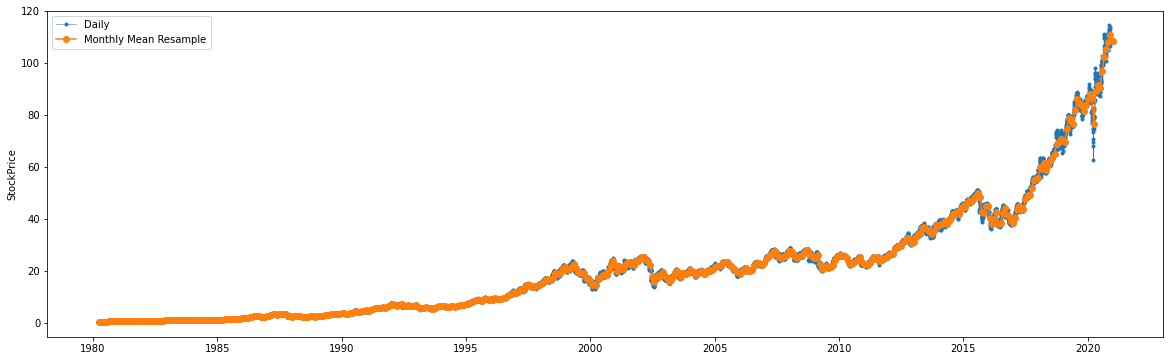

In [35]:
#Visualize de Data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

y=df["close"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('M').mean(),marker='o', markersize=6, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('StockPrice')
ax.legend();

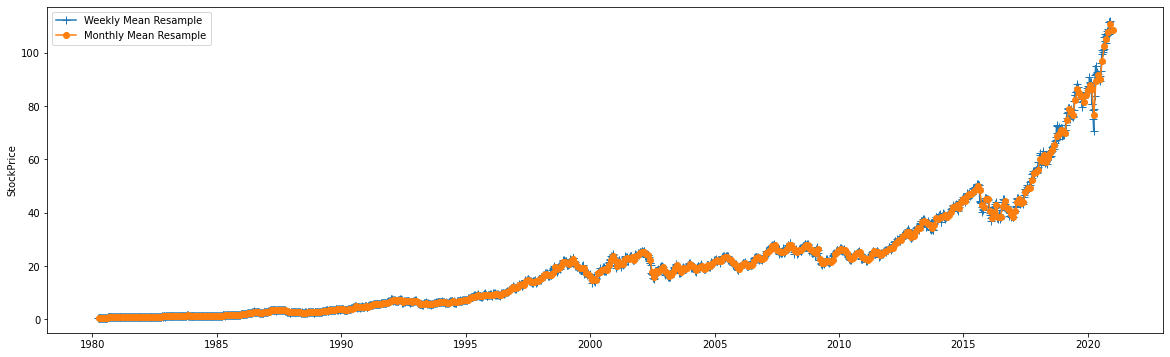

In [36]:
y=df["close"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y.resample('W').mean(),marker='+', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(y.resample('M').mean(),marker='o', markersize=6, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('StockPrice')
ax.legend();

In [37]:
# Decompose the Data
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [38]:
y_W=y.resample('W').mean()

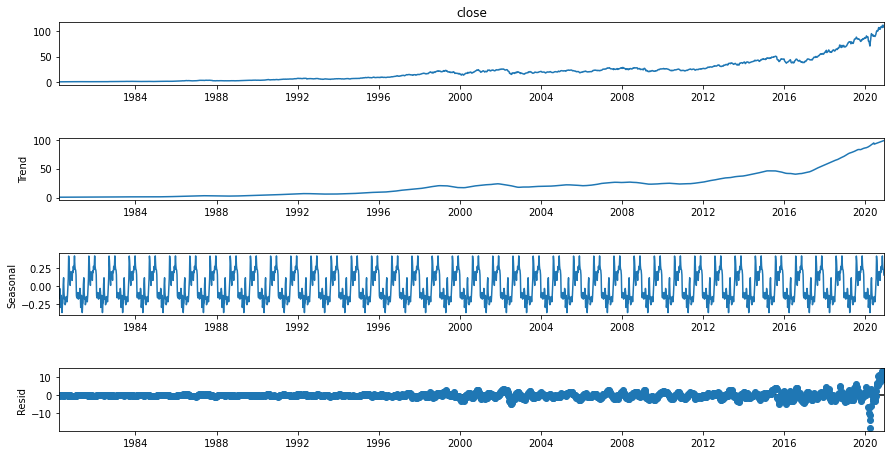

In [39]:
seasonal_decompose(y_W)

In [40]:
#Test for stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

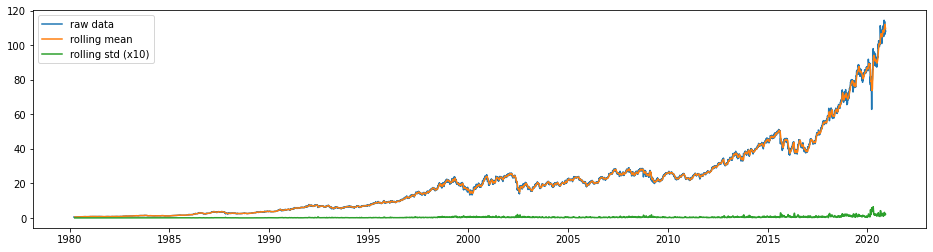

In [41]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [42]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [43]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = 4.777
P-value = 1.000
Critical values :
	1%: -3.4309893882325735 - The data is not stationary with 99% confidence
	5%: -2.8618225722642565 - The data is not stationary with 95% confidence
	10%: -2.5669204080727814 - The data is not stationary with 90% confidence


In [44]:
#Make the data stationary
#detrending
y_detrend =  (y- y.rolling(window=12).mean())/y.rolling(window=12).std()

 > Is the de-trended data stationary ?
Test statistic = -25.035
P-value = 0.000
Critical values :
	1%: -3.4309885141912013 - The data is  stationary with 99% confidence
	5%: -2.8618221860305217 - The data is  stationary with 95% confidence
	10%: -2.566920202480407 - The data is  stationary with 90% confidence


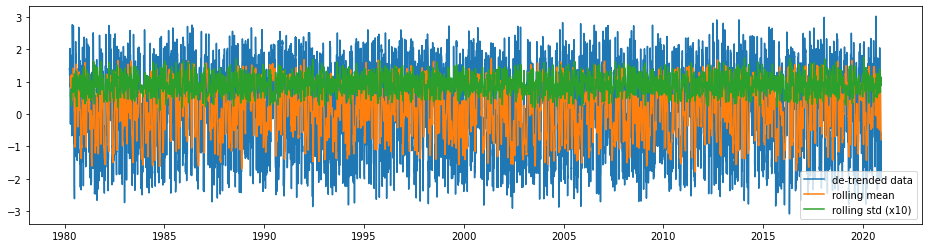

In [45]:
test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

In [46]:
y_detrend.dropna()

timestamp
1980-04-01    1.39007915
1980-04-02    1.42082073
1980-04-03    1.22048600
1980-04-07    1.12212270
1980-04-08    0.84884921
                 ...    
2020-11-25   -1.98058745
2020-11-27   -1.21564280
2020-11-30   -0.81684318
2020-12-01   -0.58951494
2020-12-02   -0.60692702
Name: close, Length: 10257, dtype: float64

 > Is the 12 lag differenced data stationary ?
Test statistic = -16.466
P-value = 0.000
Critical values :
	1%: -3.430990201987763 - The data is  stationary with 99% confidence
	5%: -2.8618229318577795 - The data is  stationary with 95% confidence
	10%: -2.566920599484578 - The data is  stationary with 90% confidence


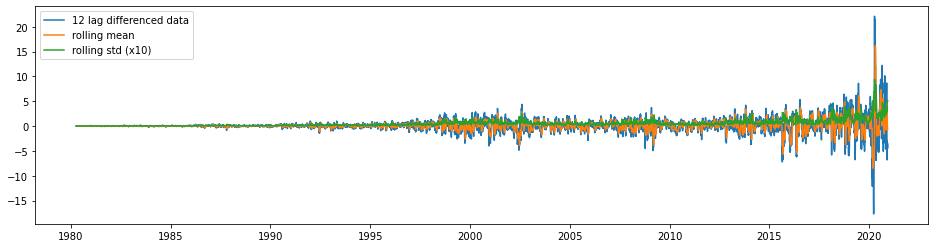

In [47]:
#Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

In [48]:
y_12lag.dropna()

timestamp
1980-04-02    0.01753521
1980-04-03    0.01402819
1980-04-07    0.00701410
1980-04-08    0.01753521
1980-04-09    0.01928872
                 ...    
2020-11-25   -2.97999573
2020-11-27   -3.18999481
2020-11-30   -4.43000031
2020-12-01   -3.45999908
2020-12-02   -4.44999695
Name: close, Length: 10256, dtype: float64

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -22.822
P-value = 0.000
Critical values :
	1%: -3.430990892169447 - The data is  stationary with 99% confidence
	5%: -2.8618232368448373 - The data is  stationary with 95% confidence
	10%: -2.566920761829341 - The data is  stationary with 90% confidence


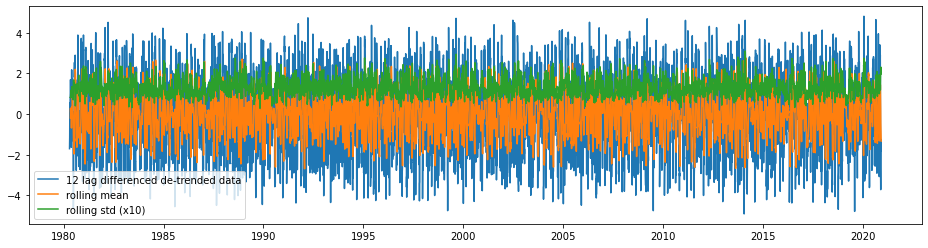

In [49]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

In [50]:
y_12lag_detrend.dropna()

timestamp
1980-04-18   -1.70040573
1980-04-21   -1.14336413
1980-04-22    0.20561655
1980-04-23   -0.13490299
1980-04-24    0.55475102
                 ...    
2020-11-25   -2.11620784
2020-11-27   -1.73865591
2020-11-30   -1.79969330
2020-12-01   -1.25067005
2020-12-02   -1.33270379
Name: close, Length: 10245, dtype: float64

#Create training and test datasets
y=y_12lag_detrend.dropna()

In [51]:
y_12lag_detrend.dropna()

timestamp
1980-04-18   -1.70040573
1980-04-21   -1.14336413
1980-04-22    0.20561655
1980-04-23   -0.13490299
1980-04-24    0.55475102
                 ...    
2020-11-25   -2.11620784
2020-11-27   -1.73865591
2020-11-30   -1.79969330
2020-12-01   -1.25067005
2020-12-02   -1.33270379
Name: close, Length: 10245, dtype: float64

y=pd.DataFrame(y)

In [52]:
dates_to_predict=[]
start = datetime.datetime.strptime("1986-03-13", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-03", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates_to_predict.append(date.strftime("%Y-%m-%d"))

In [53]:
y

timestamp
1980-03-17     0.50150645
1980-03-18     0.50501347
1980-03-19     0.51202756
1980-03-20     0.49975294
1980-03-21     0.50501347
                 ...     
2020-11-25   106.41000366
2020-11-27   107.62000275
2020-11-30   108.22000122
2020-12-01   108.48999786
2020-12-02   108.15000153
Name: close, Length: 10268, dtype: float64

In [54]:
y.loc['1986-04-16']

2.5180532932281494

In [55]:
y_to_train = y[:'2019-12-03']
y_to_val = y['2019-12-03':] # last X months for test  
predict_date = len(y) - len(y[:'2019-12-03'])# dataset to train

In [56]:
y=pd.DataFrame(y)

In [57]:
y_to_train

timestamp
1980-03-17    0.50150645
1980-03-18    0.50501347
1980-03-19    0.51202756
1980-03-20    0.49975294
1980-03-21    0.50501347
                 ...    
2019-11-26   85.41999817
2019-11-27   85.41999817
2019-11-29   85.44999695
2019-12-02   84.51000214
2019-12-03   84.36000061
Name: close, Length: 10016, dtype: float64

In [58]:
y_to_val

timestamp
2019-12-03    84.36000061
2019-12-04    85.18000031
2019-12-05    85.23999786
2019-12-06    85.48000336
2019-12-09    83.87000275
                 ...     
2020-11-25   106.41000366
2020-11-27   107.62000275
2020-11-30   108.22000122
2020-12-01   108.48999786
2020-12-02   108.15000153
Name: close, Length: 253, dtype: float64

In [59]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [60]:
sarima_grid_search(y,12)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no ass

The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:14091.672209515786


In [61]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3696      0.016    -22.932      0.000      -0.401      -0.338
ma.L1          0.2576      0.016     15.736      0.000       0.226       0.290
ma.S.L12       0.0004      0.003      0.128      0.898      -0.005       0.006
sigma2         0.2312      0.001    338.629      0.000       0.230       0.233


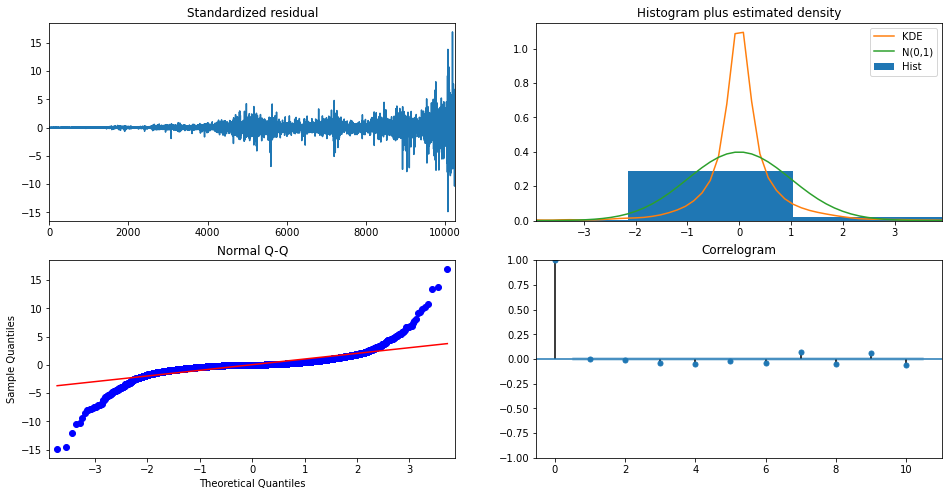

In [62]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [63]:
import sklearn
from sklearn.metrics import r2_score
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results=mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted)
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted_dynamic)
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')

    plt.legend()
    plt.show()
    
    return (results)

import sklearn
from sklearn.metrics import r2_score
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results=mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    r2=sklearn.metrics.r2_score(y_to_test, y_forecasted)
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))
    print('The R2 of the model is: ',r2)
    
    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Stockprices')
    plt.legend()
    plt.show()
    
    return (results)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3664      0.016    -22.532      0.000      -0.398      -0.335
ma.L1          0.2542      0.017     15.382      0.000       0.222       0.287
ar.S.L12       0.2934      0.274      1.072      0.284      -0.243       0.830
ma.S.L12      -0.3043      0.273     -1.114      0.265      -0.840       0.231
sigma2         0.2312      0.001    329.019      0.000       0.230       0.233


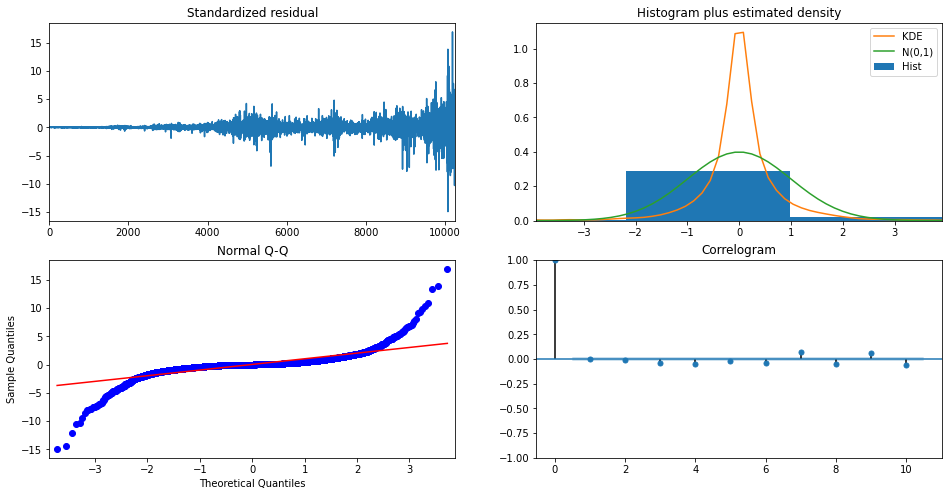

The Root Mean Squared Error of SARIMA with season_length=365 and dynamic = False 2.06
The R2 of the model is:  0.9614628062261505


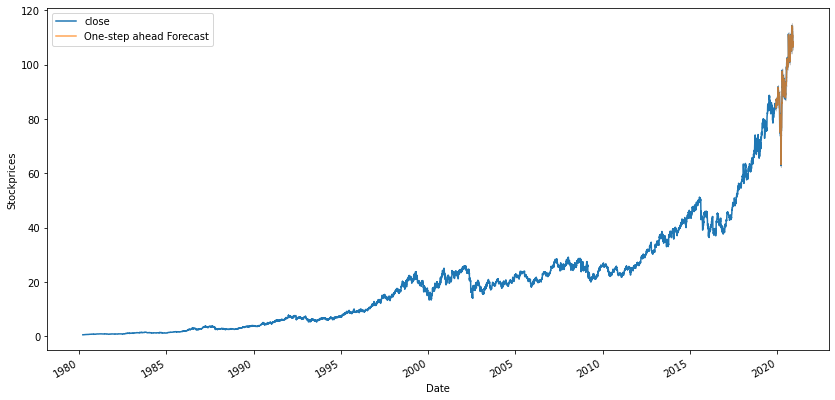

The Root Mean Squared Error of SARIMA with season_length=365 and dynamic = True 14.37
The R2 of the model is:  -0.8812172322057339


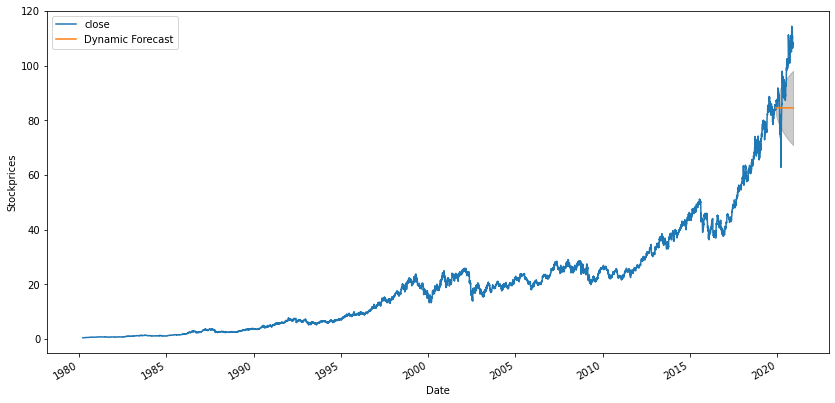

In [66]:
model=sarima_eva(y,(1, 1, 1),(1, 0, 1, 12),365,'2019-12-03',y_to_val)

# Forecasting

Some of the values are missing and therefore removed from the index, thus, there is no clear frequency in the index. We will need to reset the index so that we are able to do the forecasting.

In [143]:
y=y.reset_index()

In [144]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps,dynamic=False)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int(dynamic=False)
    #print(pred_ci)
    ax = y.close.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel("close")

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    display(pci)
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

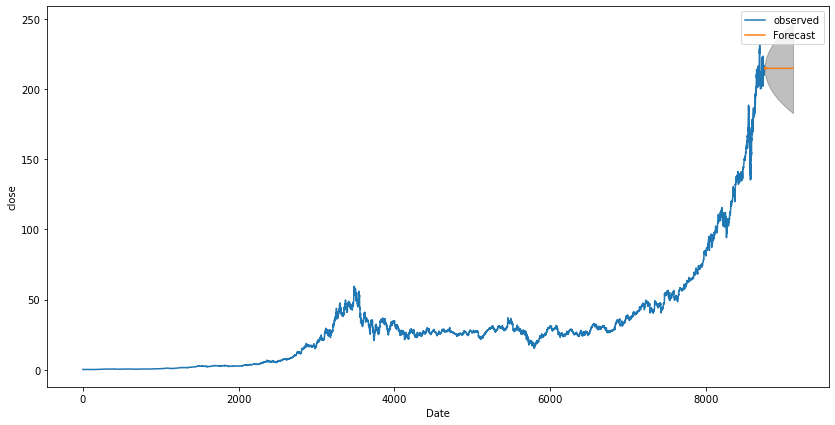

,Date,Lower Bound,Upper Bound
0,8754,213.70078975,217.63511375
1,8755,212.94326767,217.91806986
2,8756,212.28691786,218.26288457
3,8757,211.76888370,218.56251733
4,8758,210.89142580,218.42467407
...,...,...,...
360,9114,183.22048110,246.77301987
361,9115,183.17649309,246.81700786
362,9116,183.13256581,246.86093512
363,9117,183.08869900,246.90480191


,Date,Predicted_Mean,Lower Bound,Upper Bound
0,8754,215.66795175,213.70078975,217.63511375
1,8755,215.43066877,212.94326767,217.91806986
2,8756,215.27490121,212.28691786,218.26288457
3,8757,215.16570051,211.76888370,218.56251733
4,8758,214.65804994,210.89142580,218.42467407


In [145]:
final_table = forecast(model,365,y)
final_table.head()

The final table comprises the predicted values, as well as the lower and upper bound which reflect the confidence interval in which are predictions are.

In [ ]:
final_table.head()

In [ ]:
import datetime

dates_to_predict=[]
start = datetime.datetime.strptime("2020-12-03", "%Y-%m-%d")
end = datetime.datetime.strptime("2021-12-03", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    dates_to_predict.append(date.strftime("%Y-%m-%d"))

In [ ]:
final_table["Date"]=dates_to_predict

In [ ]:
final_table.head()

In [ ]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    final_table.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

In [ ]:
len(df)

In [ ]:
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()